In [ ]:
##================================================
## このセルを最初に実行せよ---Run this cell first.
##================================================
!wget -P . https://raw.githubusercontent.com/UTokyo-IPP/annex/master/assignments/project1/corpus_stoplist.txt
!wget -P . https://raw.githubusercontent.com/UTokyo-IPP/annex/master/assignments/project2/test_org.json
!wget -P . https://raw.githubusercontent.com/UTokyo-IPP/annex/master/assignments/project2/train_org.json

--2022-11-27 08:01:38--  https://raw.githubusercontent.com/UTokyo-IPP/annex/master/assignments/project1/corpus_stoplist.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587 [text/plain]
Saving to: ‘./corpus_stoplist.txt.1’

corpus_stoplist.txt 100%[===================>]     587  --.-KB/s    in 0s      

2022-11-27 08:01:38 (8.26 MB/s) - ‘./corpus_stoplist.txt.1’ saved [587/587]

--2022-11-27 08:01:38--  https://raw.githubusercontent.com/UTokyo-IPP/annex/master/assignments/project2/test_org.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

# ミニプロジェクト（発展課題） / Miniproject (Advanced exercises)

## Project2. 自分のアイディアで手法を改良しよう（発展課題）

基礎課題では、6人の著者の小説からなるデータセット $D$ を学習データとして、著者が未知の小説12本を分類しました。   
これらの小説の中には、正しく分類できたものもあれば、正しく分類できなかったものもありました。   

そこで発展課題では、基礎課題で実装した手法をベースライン（基準）とし、それよりも高い精度で分類できるよう、手法を改良してください。    
**皆さん自身で考えたアイディアを実装**し、**ベースラインの手法と皆さんの提案手法とで精度を比較評価した結果を報告**してください。  
適宜、図や表を使って構いません。  
また、Markdownセルを利用し、**なぜ提案手法がうまくいくのか（あるいはうまくいくと考えたのか）を分かりやすく説明し、判別に失敗した小説がある場合は、失敗した理由を議論**して下さい。

なお、精度 (Accuracy) は、著者が未知の小説の総数を$N$、正しく分類できたものの数を$TP$とすると、以下の式で評価するものとします。   
$$\text{Accuracy} = \frac{TP}{N}$$   

以下のコードで使用する6名の著者は以下の通りです。  

- 太宰治
- 宮沢賢治
- 夏目漱石
- 林芙美子
- 芥川龍之介
- 坂口安吾

### 注意事項

提出ファイルは1 MBを超えないようにしてください。大量の中間結果を`print`で書き出すようなコードは止めてください。

### ライセンス

本課題の作品データは[青空文庫](https://www.aozora.gr.jp/index.html)のものを使用しています。   
記して感謝の意を表します。   
なお、ルビや入力者注、アクセント分解された欧文や編者による注記等は削除しました。   
また、著者毎の学習データの文字数が概ね同じになるよう、作品数を調整しています。

クリエイティブコモンズ 表示 - 非営利 2.1 日本 (CC BY-NC 2.1 JP)の下にライセンスされています。
詳しくは[こちら](https://www.aozora.gr.jp/guide/kijyunn.html)を参照してください。

![CC-BY-NC_icon.svg](https://licensebuttons.net/l/by-nc/3.0/88x31.png)

## Project2. Let's improve the baseline method with your own idea (Advanced exercises)

In the basic exercises, you implemented a program to classify the novels written by six authors, which were extracted from the [Aozora Bunko](https://www.aozora.gr.jp/index.html), using the dataset $D$ as the training data.   
Some of these novels could be classified correctly, while the others could not.   

In the advanced exercises, consider the method implemented in the basic exercises as a baseline method and improve it so that it achieves higher accuracy than the original one.   
**Please report the results of implementing your own ideas and comparing and evaluating the accuracy of the baseline method with that of your proposed method.**   

You can use diagrams and tables to illustrate your method, as appropriate.   
Also, using the Markdown cell, **explain clearly why the proposed method works (or you thought it would work), and if there are novels that failed to be classified, discuss the reasons of the failure.**

The accuracy is evaluated by the following equation:  
$$\text{Accuracy} = \frac{TP}{N},$$   
where $N$ is the total number of novels in the test set and $TP$ is the number of novels that are classified correctly.

The list of the authors' names are as follows;   
- 太宰治
- 宮沢賢治
- 夏目漱石
- 林芙美子
- 芥川龍之介
- 坂口安吾

### Caution

Submitted files are not allowed to exceed 1 MB. Please do not submit such code that outputs a lot of intermediate results by using `print` and so on.

### Licenses

The data for this assignment is derived from [Aozora Bunko](https://www.aozora.gr.jp/index.html).   
We would like to express our appreciation.   
Note that we have removed ruby characters, typists' notes, accent-decomposed European text, and notes by the editor.   
The number of novels has been adjusted so that the number of characters in the training data is approximately the same among the authors.

This dataset inherits the Creative Commons Attribution 2.1 Japan (CC BY 2.1 JP) licenses as well.
For details, refer to [this site](https://www.aozora.gr.jp/guide/kijyunn.htm).

![CC-BY-NC_icon.svg](https://licensebuttons.net/l/by-nc/3.0/88x31.png)

## 準備：訓練データの読み込み

基礎課題では、訓練データは予め重要語が抽出されていましたが、発展課題では原文のままのデータを配布します。   
データはJSON形式です。   
以下のコードを使って、訓練データ $D$ を辞書 `D` に読み込んでください。


## Preparation: Reading the training data

In the basic exercises, the important words were extracted from the training data beforehand, but in the advanced exercises, we deliver the original texts.   
The data is in JSON format.   
Use the following code to load the training data $D$ into the dictionary `D`.

In [ ]:
### Given code:
import json

D = {}
with open('train_org.json', 'r', encoding='utf-8') as f:
    D = json.load(f)


訓練データ `D` は辞書で、ある著者の名前を `name` とすると、`D[name]` によって、その著者の小説集合がリストとして得られます。ここで、著者の名前とは、冒頭で述べた6名の著者 (`太宰治`, `宮沢賢治`, `夏目漱石`, `林芙美子`, `芥川龍之介`, `坂口安吾`) のいずれかです。   
`D[name]` であるリストの要素は各小説を格納した辞書であり、`'title'` というキーの値は小説の題名、`'text'` のというキーの値は小説の本文です。   
小説の本文は各パラグラフ（文字列）を要素とするリストで与えられます。   
以下のコードで、6名の各著者について、最初に登録されている小説の題名と本文の最初の3行を書き出してみましょう。

The training data `D` is a dictionary, and if `name` is the name of an author, `D[name]` gives the set of novels of the author as a list. Here, the name of the author is one of the six authors mentioned at the beginning (`太宰治`, `宮沢賢治`, `夏目漱石`, `林芙美子`, `芥川龍之介` and `坂口安吾`).   
Each element in the list `D[name]` is a dictionary that stores a novel, where the value of the key `'title'` is the title of the novel, and that of the key `'text'` is the text of the novel.   
The text of the novel is given as a list of paragraphs (strings).   
The following code outputs the title and the first three paragraphs of the text of the first registered novel of each of the six authors.

In [ ]:
### Given code:

for name in D:
    print('name:', name)
    print('title', D[name][0]['title'])
    print('text', D[name][0]['text'][:3])


name: 太宰治
title 創作余談
text ['創作余談、とでもいったものを、と編輯者からの手紙にはしるされて在った。それは多少、てれくさそうな語調であった。そう言われて、いよいよてれくさいのは、作者である。この作者は、未だほとんど無名にして、創作余談とでもいったものどころか、創作それ自体をさえ見失いかけ、追いかけ、思案し、背中むけ、あるいは起き直り、読書、たちまち憤激、巷を彷徨、歩きながら詩一篇などの、どうにもお話にならぬ甘ったれた文学書生の状態ゆえ、創作余談、はいそうですか、と、れいの先生らしい苦心談もっともらしく書き綴る器用の真似はできぬのである。', 'できるようにも思うのであるが、私は、わざと、できぬ、という。無理にも、そう言う。文壇常識を破らなければいけないと頑固に信じているからである。常識は、いいものである。これには従わなければいけない。けれども常識は、十年ごとに飛躍する。私は、人の世の諸現象の把握については、ヘエゲル先生を支持する。', 'ほんとうは、マルクス、エンゲルス両先生を、と言いたいところでもあろうが、いやいや、レニン先生を、と言いたいところでもあろうが、この作者、元来、言行一致ということに奇妙なほどこだわっている男で、いやいや、そう言ってもいけない、この作者、元来、非惨を愛する趣味家であって、安心立命の境地を目して、すべて崩壊の前提となし、ああ、あとの言葉は、諸兄のうち、心ある者、つづけ給え。']
name: 宮沢賢治
title 虔十公園林
text ['虔十はいつも繩の帯をしめてわらって杜の中や畑の間をゆっくりあるいてゐるのでした。', '雨の中の青い藪を見てはよろこんで目をパチパチさせ青ぞらをどこまでも翔けて行く鷹を見付けてははねあがって手をたゝいてみんなに知らせました。', 'けれどもあんまり子供らが虔十をばかにして笑ふものですから虔十はだんだん笑はないふりをするやうになりました。']
name: 夏目漱石
title イズムの功過
text ['大抵のイズムとか主義とかいうものは無数の事実を几帳面な男が束にして頭の抽出へ入れやすいように拵えてくれたものである。一纏めにきちりと片付いている代りには、出すのが臆劫になったり、解くのに手数がかかったりするので、いざという場合には間に合わない事が多い。大抵のイズムはこの点において、

## 準備：評価データの読み込み

評価データもJSON形式です。
以下のコードを使って、評価データ $A$ をリスト `A` に読み込んでください。   


## Preparation: Reading the test data¶

The test data is also in JSON format.   
Use the following code to load the test data $A$ into the list `A`.   

In [ ]:
### Given code:
import json

A={}
with open('test_org.json', 'r', encoding='utf-8') as f:
    A = json.load(f)


リスト `A` には合計120作品の小説が納められています。  
各小説は辞書であり、`'title'` というキーの値は小説の題名、`'text'` というキーの値は小説の本文です。   
小説の本文は各パラグラフ（文字列）を要素とするリストで与えられます。
また、`'true_author'` というキーの値は、その小説の（隠された）正解の著者名です。この著者名をなるべく精度よく当てることが課題です。   
以下のコードで `A` に登録されている `0` 番目の小説の題名と本文の最初の3行、および正解の著者名を書き出してみましょう。

The list `A` contains 120 novels in total.  
Each novel is a dictionary, where the value of the key `'title'` is the title of the novel, and that of the key `'text'` is the text of the novel.    
The text of the novel is given as a list of paragraphs (strings).
The value of the key `'true_author'` is the (hidden) true author name of the novel. The challenge is to guess the name of this author as accurately as possible.   
The following code outputs the title, the first three paragraphs of the text, and the true author name of the `0`-th novel registered in `A`.

In [ ]:
### Given code:

print(len(A))
print('title:', A[0]['title'])
print('text:', A[0]['text'][:3])
print('Correct answer label:', A[0]['true_author'])


120
title: 老ハイデルベルヒ
text: ['八年まえの事でありました。当時、私は極めて懶惰な帝国大学生でありました。一夏を、東海道三島の宿で過したことがあります。五十円を故郷の姉から、これが最後だと言って、やっと送って戴き、私は学生鞄に着更の浴衣やらシャツやらを詰め込み、それを持ってふらと、下宿を立ち出で、そのまま汽車に乗りこめばよかったものを、方角を間違え、馴染みのおでんやにとびこみました。其処には友達が三人来合わせて居ました。やあ、やあ、めかして何処へ行くのだと、既に酔っぱらっている友人達は、私をからかいました。私は気弱く狼狽して、いや何処ということもないんだけど、君たちも、行かないかね、と心にも無い勧誘がふいと口から辷り出て、それからは騎虎の勢で、僕にね、五十円あるんだ、故郷の姉から貰ったのさ、これから、みんなで旅行に出ようよ、なに、仕度なんか要らない、そのままでいいじゃないか、行こう、行こう、とやけくそになり、しぶる友人達を引張るようにして連れ出してしまいました。あとは、どうなることか、私自身にさえわかりませんでした。あの頃は私も、随分、呑気なところのある子供でした。世の中も亦、私達を呑気に甘えさせてくれていました。私は、三島に行って小説を書こうと思って居たのでした。三島には高部佐吉さんという、私より二つ年下の青年が酒屋を開いて居たのです。佐吉さんの兄さんは沼津で大きい造酒屋を営み、佐吉さんは其の家の末っ子で、私とふとした事から知合いになり、私も同様に末弟であるし、また同様に早くから父に死なれている身の上なので、佐吉さんとは、何かと話が合うのでした。佐吉さんの兄さんとは私も逢ったことがあり、なかなか太っ腹の佳い方だし、佐吉さんは家中の愛を独占して居るくせに、それでも何かと不平が多い様で、家を飛出し、東京の私の下宿へ、にこにこ笑ってやって来た事もありました。さまざま駄々をこねて居たようですが、どうにか落ち附き、三島の町はずれに小ぢんまりした家を持ち、兄さんの家の酒樽を店に並べ、酒の小売を始めたのです。二十歳の妹さんと二人で住んで居ました。私は、其の家へ行くつもりであったのです。佐吉さんから、手紙で様子を聞いているだけで、まだ其の家を見た事も無かったので、行ってみて具合が悪いようだったらすぐ帰ろう、具合がいいようだったら一夏置いて貰って、小説を一篇書

## 皆さんのコードおよび解説

以下で皆さんのコードやその解説、結果の評価および議論を行ってください。   
- この 'project2.ipynb' は自動採点されません．答案検査システムもありません。教員やTAが一つずつ見て採点します。
- 解説や議論はMarkdownセルに、コードはCodeセルに記入してください。
- 提出されたipynbファイルは教員のPCで実行したうえで評価します。実行に必要な追加パッケージがあれば指定するなどして、実行できるファイルを提出してください。
- Codeセル、Markdownセルは必要に応じて増やして構いません

## Describe your code and explain it
Describe your code, explanation and discussion below.
- This notebook 'project2.ipynb' will not be automatically graded at all. No automatic checking for it is provided. The faculty members and TAs will read and execute this notebook and give a grade manually.
- Fill the explanation and discussion of your method in Markdown cells. The code should be written in Code cells.
- The submitted notebook will be executed on the faculty member's PC before grading. Please submit an executable file, specifying all additional packages required for execution if any.
- You can add Code cells and Markdown cells as needed.

# 提案手法の概要 / Outline of your proposed method

The proposed method utilized machine learning algorithm in python using Scikit-Learn. Firstly, data was prepared into train and test dataset. Then, text_process() function was created to change texts into list of words. The list of words then further vectorized and transformed into numerical data. Then, Machine learning model is applied to the train data using Multinomial Naive Bayes Algorithm. Lastly, we eveluate the model through several methods defining accuracy of this model.


# 着想に至った経緯 / Background to the idea

I have been studied a lot about machine learning and how to create machine learning model using scikit-Learn. Since there is train data and test data provided in this project, I decided to try applying what I have learned in classes to this problems.

# 処理の流れ / Processing flow

1. First step <br>
Prepare data into X_train, X_test, y_train, y_test while encode author name into numbers from 0 to 5 in alphabetic order.
太宰治 ->2, 
宮沢賢治->3, 
夏目漱石->1, 
林芙美子->4, 
芥川龍之介->5, 
坂口安吾->0

1. Second step <br>
Create text_process() function that changes texts into list of important words. Here, we did not count stop words which are not useful for the purpose of processing and, hence, are removed from the list of important words.

1. Third step <br>
Feature engineering using bags-of-words. Since only numeric data can work with machine learning algorithms, textual data in X_train, X_test is transformed and vectorized into numeric data.

1. Fourth step <br>
Training the model utilizing a classifier called Multinomial Naive Bayes Algorithm

1. Fifth step <br>
Evaluate model using model.score() defining training and validation accuracy. Precision, Recall, F1–Score, and confusion matrix were also calculated.


In [ ]:
# 提案手法のコード / The code of your proposed method
# 注意: 適宜、コメント行として解説を書き込み、わかりやすいコードとなるように務めてください。
# Note: Write commentaries as comment lines where appropriate and try to make the code easy to understand.
!pip install janome
from janome.tokenizer import Tokenizer

T = Tokenizer()

#D = train data
#A = test data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder

#prepare train data from dataset D
X_train = []
y_train = []
for author in D:
  for book in D[author]:
    X_train.append(book['text'])
    y_train.append(author)

#prepare test data from dataset D
X_test=[]
y_test=[]
for book in A:
  X_test.append(book['text'])
  y_test.append(book['true_author'])

#encoded label of author too numbers (0-5) in alphanumeric order
# 太宰治 ->2
# 宮沢賢治->3
# 夏目漱石->1
# 林芙美子->4
# 芥川龍之介->5
# 坂口安吾->0
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)


In [ ]:
#create stop list that fill with stop words which are word that is not important
stop_list = []
with open('corpus_stoplist.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stop_list.append(line.rstrip('\n'))

#create text_process function
#that change strings to words returning list of important words
def text_process(text, stop=stop_list):
  ret=[]
  for doc in text:
    for token in T.tokenize(doc):
      if ('形容詞,自立' in token.part_of_speech) or ('動詞,自立' in token.part_of_speech) or ('名詞' in token.part_of_speech):
        if not (token.base_form in stop):
          ret.append(token.base_form)
  return ret


In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# vectorize data into bag-of-words numeric data
# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=CountVectorizer(analyzer=text_process, min_df=0.5).fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [ ]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

# 評価 / Evaluation

utilize model.score() to evaluate accuracy of the model. Here we both check training accuracy and Validation Accuracy. Precision, Recall, F1–Score, and confusion matrix were also calculated.


In [ ]:
# 提案手法の評価に関するコード / The code for evaluation of your method
# use model.score for evaluation of this model 
print("Training accuracy:{}".format(model.score(text_bow_train, y_train)))
print("Validation accuracy:{}".format(model.score(text_bow_test, y_test)))

Training accuracy:0.8529411764705882
Validation accuracy:0.7333333333333333


In [ ]:
# Importing necessary libraries
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.79      0.55      0.65        20
           2       0.79      0.75      0.77        20
           3       0.73      0.80      0.76        20
           4       0.82      0.90      0.86        20
           5       0.68      0.85      0.76        20

    accuracy                           0.73       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.74      0.73      0.73       120



Normalized confusion matrix
[[0.55 0.1  0.05 0.1  0.05 0.15]
 [0.2  0.55 0.   0.   0.05 0.2 ]
 [0.05 0.   0.75 0.15 0.   0.05]
 [0.05 0.05 0.05 0.8  0.05 0.  ]
 [0.   0.   0.1  0.   0.9  0.  ]
 [0.05 0.   0.   0.05 0.05 0.85]]


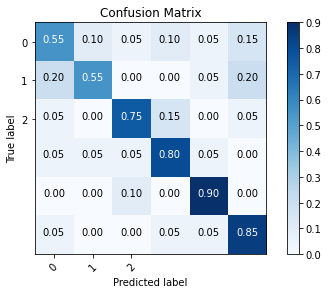

In [ ]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test,predictions)
plt.figure()

plot_confusion_matrix(cm, classes=[0,1,2], normalize=True, title='Confusion Matrix')

# 議論と結論 / Discussion and conclusion

Machine learning algorithm is utilized in this proposed method. The vecorization process took a lot of time in this method. Multinomial Naive Bayes Algorithm (Classifier) is utilize in training the model. The results showed that this proposed method could succefully classify and guess the author of the test data with validation accuracy of 73%. 

However, the method that is used in vectorization of data took too much time in vectorizing both test and train data. Moreover, we can see from confusion matrix that guessing books from 坂口安吾(labeled 0) and 夏目漱石(labeled 1) got the lowest accuracy of 55% while 林芙美子(labeled 4) has the highest accuracy of 90%.

It is believed that changing typr of classifier or value of min_df might change the accuracy of this model.

<br>
Reference<br>
https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634